<a href="https://colab.research.google.com/github/ewerton-andrade/previsao-abertura-apple/blob/main/Previs%C3%A3o_Valor_A%C3%A7%C3%B5es_Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ESTUDO DE CASO NO MERCADO FINANCEIRO**

## Proposta do projeto: Previsão do preço de abertura das ações da apple.

#### Um dos parâmetros utilizados e registrados envolvendo ações dentro do mercado financeiro é o preço de abertura de uma ação. Esse valor de abertura é o preço da primeira transação do dia envolvendo uma ação específica. O projeto que veremos a seguir utiliza esse dado como base para previsão do preço de abertura das ações da apple.

#### Esse projeto é um exemplo de aplicação da Ciência de dados no mercado financeiro. É possível utilizar modelos que ajudem a prever o valor de uma ação. 

#### Em específico, vou produzir um modelo através de redes neurais recorrentes por meio do framework Keras para fazer essa previsão.

## Bibliotecas utilizadas para o projeto:

###python 3.7.12
###numpy 1.19.5
###pandas 1.1.5
###matplotlib 3.2.2
###sklearn 1.0.1
###keras 2.7.0

## Começando

### Dicionário dos atributos do dataset:

* **Date**: Data da amostra
* **Open**: Preço da primeira transação efetuada durante o dia.
* **High**: Preço máximo de transação efetuada no dia.
* **Low**: Preço mínimo de transação efetuada no dia.
* **Close**: Preço da última transação efetuada no dia.
* **Adj Close**: Preço de fechamento ajustado para refletir o valor após a contabilização de quaisquer ações corporativas.
* **Volume**: Número de unidades de ações vendidas em um dia.

## **Import de bibliotecas**

In [ ]:
import numpy as np  # biblioteca utilizada para tratar com número/vetores/matrizes
import matplotlib.pyplot as plt # utilizada para plotar gráficos ao "estilo" matlab
import pandas as pd #biblioteca utilizada para realizar operações sobre dataframes

## **Carregando os dados**

In [ ]:
#Carregando os dados direto do google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Carregando os dados (Obs: É mais fácil fazer o uploado do arquivo para o colab)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Science_Projects/PREVISÃO VALOR AÇÕES APPLE (ABERTURA)/AAPL.csv') #carregar o arquivo csv para leitura pandas
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090540,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093165,73449600
...,...,...,...,...,...,...,...
10304,2021-10-25,148.679993,149.369995,147.619995,148.639999,148.639999,50720600
10305,2021-10-26,149.330002,150.839996,149.009995,149.320007,149.320007,60893400
10306,2021-10-27,149.360001,149.729996,148.490005,148.850006,148.850006,56094900
10307,2021-10-28,149.820007,153.169998,149.720001,152.570007,152.570007,100077900


## **Análise exploratória de dados**

In [ ]:
data.head() #comando utilizado para mostrar as 5 primeiras colunas do dataframe

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090540,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093165,73449600


In [ ]:
data.info() #verificando algumas características gerais do DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10309 entries, 0 to 10308
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10309 non-null  object 
 1   Open       10309 non-null  float64
 2   High       10309 non-null  float64
 3   Low        10309 non-null  float64
 4   Close      10309 non-null  float64
 5   Adj Close  10309 non-null  float64
 6   Volume     10309 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 563.9+ KB


## Observações

## Temos no total um DataSet com 10.309 amostras e 7 atributos (Ver dicionário de atributos no início desse projeto). 

## Não temos nenhum valor nulo em nenhum dos atributos. Todas as amostras estão presentes. O atributo Date está como tipo objeto, talvez seja necessário mudar para o tipo datetime.

Text(0.5, 0, 'Data')

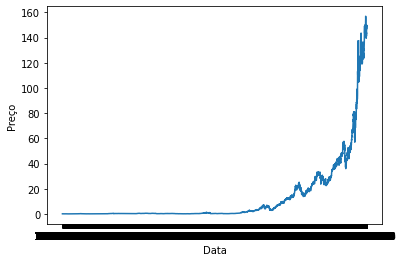

In [ ]:
#Gráfico em linha preço (eixo y) e data (eixo x)
plt.plot(data["Date"],data["Open"]) #set de dados eixo x e y, respctivamente
plt.ylabel("Preço") #set de label para o eixo y
plt.xlabel("Data") #set de label para o eixo x

## Vemos que o preço de abertura das ações da apple se mantiveram praticamente constante até um certo ponto e depois de algum tempo obtivemos valorizações que formam quase que um vestígio de função exponencial.

## **Verificando outliers**

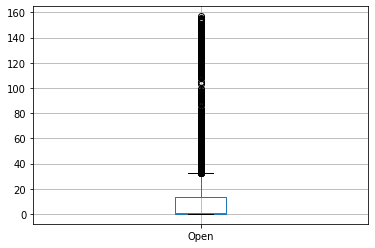

In [ ]:
#comando utilizado para gerar o boxplot
data.boxplot(column='Open')

# Obs: boxplot é empregado na estatística para ver se existem outlier's 
#nos nossos dados, caso haja, há dados que se concentram fora dos limites
#do gráfico.

## Observação: No caso acima temos uma progressão real de valores de ações na bolsa. Estatisticamente falando, na teoria, alguns valores deveriam ser considerados outliers, porém, esses dados referem-se a aumentos reais em um relativo curto período tempo.

## **Pré-Processamento de dados**

In [ ]:
#preparando os dados para a entrada
entradas=data.iloc[:,1:2].values # retira do dataframe apenas a coluna relativa ao preço de abertura das ações
entradas[:5] #utilizada para realiar um print apenas das 5 primeiras linhas (pode ser visto que esse é um array, não um dataframe)

array([[0.128348],
       [0.12221 ],
       [0.113281],
       [0.115513],
       [0.118862]])

## **Normalização de dados**

In [ ]:
#normalizando os dados (os algoritmos de ML, em geral, não trabalham bem com dados em escalas diferentes)
from sklearn.preprocessing import MinMaxScaler  #biblioteca utilizada para realizar o preprocessamento dos dados
scaler = MinMaxScaler(feature_range = (0, 1))    #cria o objeto que será utilizado para realizar a normalização dos dados
                                                 # feaure_range = define o intervalo de escala dos dados

dados_normalizados = scaler.fit_transform(entradas)  # aplica o método de transformação dos dados

In [ ]:
#Print das cinco primeiras linhas dos dados normalizados
dados_normalizados[:5]

array([[0.00050139],
       [0.00046228],
       [0.00040538],
       [0.0004196 ],
       [0.00044094]])

## **Preparando os dados para a rede neural recorrente**

In [ ]:
# Como as redes recorrentes utilizam dados no tempo T e valores passados (T-n), 
#a entrada da rede deve conter os valores presentes e os (T-n). 
# Assim, é necessário realizar uma modificação nos dados
features_set = []  
labels = []  
for i in range(60, 10249):  
    features_set.append(dados_normalizados[i-60:i, 0])
    labels.append(dados_normalizados[i, 0])

In [ ]:
#transformando os dados em um array para serem utilizados como entrada
features_set, labels = np.array(features_set), np.array(labels)  

In [ ]:
#conferindo a dimensão dos dados
print(features_set.shape) # método utilizado para retornar a dimensão dos dados
print(labels.shape)

(10189, 60)
(10189,)


In [ ]:
#transformando os dados para o formato aceito pelas redes recorrentes do Keras
# 1 - formato em 3D
# (a,b,c) -> a = número de linhas do dataset
#         -> b = número de steps (entradas) da rede
#         -> c = número de saídas (indicators)

# método da biblioteca numpy que é utilizado para converter os dados de entrada (1199,60) em (1199,60,1)
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  # 
print(features_set.shape)

(10189, 60, 1)


## **Import's**

In [ ]:
from keras.models import Sequential  #classe utilizada para criar o modelo sequencial utilizando o keras
from keras.layers import Dense  # Classe utilizada para criar as camadas que são completamente conectadas
from keras.layers import LSTM  # Classe para a rede recorrente utilizando Long Shor Term Memory
from keras.layers import Dropout # Classe utilizada para a camada de dropout (utilizada para evitar o overfiting)

## **Montando as camadas da rede**

In [ ]:
model = Sequential()  # objeto para a criação do modelo keras sequencial
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  #cria a camada de entrada
# como pode ser visto, ela é adicionada como uma pilha, cada nova camada é adicionada com o método add
# na camada de entrada, é necessário definir o tamanho do vetor de entrada (input_shape)
# units=50 indica que na camada de entrada devem existir 50 neurônios
# return_sequences= True indica que devem ser adicionadas novas camadas

In [ ]:
#adição da camada de dropout
model.add(Dropout(0.2))  # o valor de 0.2 indica que 20% dos neurônios dessa camada serão perdidos para cada interação

In [ ]:
#Adicionando mais camadas ao modelo 
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  # como essa é a última camada LSTM utilizada, a variável return_sequences=False 
model.add(Dropout(0.2))  

In [ ]:
#adiciona a camada de saída com apenas 1 neurônio, pois vamos realizar a previsão de apenas uma variável (Previsão do valor de abertura)
model.add(Dense(units = 1))

In [ ]:
#comando utilizado para ver a configuração do nosso modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_7 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [ ]:
#definição do tipo de função perda a ser utilizada e do tipo do otimizador 
# o otimizador é utilizado para minimizar a função perda
# a função perda indica como deve ser calculado o erro do modelo (valor real - valor previsto)
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

## **Treinamento do modelo**

In [ ]:
#treinamento do modelo
model.fit(features_set, labels, epochs = 100, batch_size = 32)  
# valores de entrada
# saída
# número épocas para o treinamento (vezes em que vamos realizar interações durante o treinamento)
#batch_size = quantidade de dados utilizados por vez para realizar o treinamento

Epoch 1/100
319/319 [==============================] - 26s 60ms/step - loss: 0.0015
Epoch 2/100
319/319 [==============================] - 19s 59ms/step - loss: 5.0546e-04
Epoch 3/100
319/319 [==============================] - 19s 60ms/step - loss: 4.8561e-04
Epoch 4/100
319/319 [==============================] - 19s 60ms/step - loss: 3.9300e-04
Epoch 5/100
319/319 [==============================] - 19s 60ms/step - loss: 4.3484e-04
Epoch 6/100
319/319 [==============================] - 19s 60ms/step - loss: 3.6448e-04
Epoch 7/100
319/319 [==============================] - 19s 60ms/step - loss: 4.5223e-04
Epoch 8/100
319/319 [==============================] - 19s 60ms/step - loss: 3.5254e-04
Epoch 9/100
319/319 [==============================] - 19s 60ms/step - loss: 4.0772e-04
Epoch 10/100
319/319 [==============================] - 19s 60ms/step - loss: 3.1284e-04
Epoch 11/100
319/319 [==============================] - 19s 60ms/step - loss: 3.2142e-04
Epoch 12/100
319/319 [============

## **Teste e validação do modelo criado**

## Carregando os dados de teste

In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Science_Projects/PREVISÃO VALOR AÇÕES APPLE (ABERTURA)/AAPL_previsao.csv') # utilizado para importar o arquivo CSV que contém o banco de dados para teste

In [ ]:
data_test.head() #verifica as 5 primeiras linhas do dataframe utilizado para teste

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,154.889999,158.850006,154.229996,157.919998,154.794983,37039700
1,2019-01-03,143.979996,145.720001,142.000000,142.190002,139.376251,91312200
2,2019-01-04,144.529999,148.550003,143.800003,148.259995,145.326126,58607100
3,2019-01-07,148.699997,148.830002,145.899994,147.929993,145.002686,54777800
4,2019-01-08,149.559998,151.820007,148.520004,150.750000,147.766861,41025300


## Plot dos dados de teste

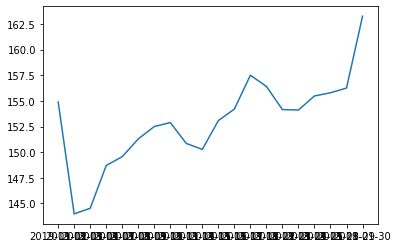

In [ ]:
plt.plot(data_test.Date,data_test.Open) #plot para os dados a serem utilizados como teste

## **Preparando os dados de teste**

In [ ]:
df_data_apple=data_test.iloc[:, 1:2].values

In [ ]:
df_data_apple = pd.concat((data['Open'], data_test['Open']), axis=0)  # concatena os dados utilizados para teste e os utilizados para treinamento, tudo em um mesmo dataframe de 1 coluna


In [ ]:
df_data_apple.head()

0    0.128348
1    0.122210
2    0.113281
3    0.115513
4    0.118862
Name: Open, dtype: float64

In [ ]:
test_inputs = df_data_apple[len(df_data_apple) - len(data_test) - 60:].values  


## Normalizando os dados de teste

In [ ]:
#normalização dos dados para teste, como fizemos com os dados de treinamento
test_inputs = test_inputs.reshape(-1,1)  
test_inputs = scaler.transform(test_inputs)  

In [ ]:
#preparação dos 60 dados a serem utilizado
test_features = []  
for i in range(60, 80):  
    test_features.append(test_inputs[i-60:i, 0])

In [ ]:
#preparando os dados como entrada para o modelo de previsão 
test_features = np.array(test_features)  
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1)) 

In [ ]:
#previsão utilizando o modelo gerado 
previsao = model.predict(test_features)  

In [ ]:
#inverte a transformação (normalização) dos dados de previsão
previsao = scaler.inverse_transform(previsao)

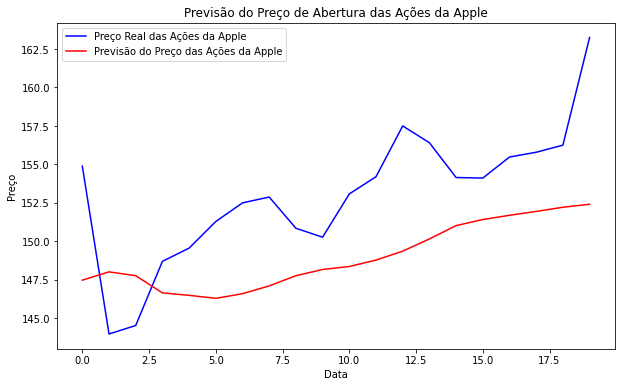

In [ ]:
#plot do resultado da previsão e do real
plt.figure(figsize=(10,6))  
plt.plot(data_test.Open, color='blue', label='Preço Real das Ações da Apple')  
plt.plot(previsao , color='red', label='Previsão do Preço das Ações da Apple')  
plt.title('Previsão do Preço de Abertura das Ações da Apple')  
plt.xlabel('Data')  
plt.ylabel('Preço')  
plt.legend()  
plt.show()

## **Conclusão**: É possível utilizar redes neurais recorrentes para aproximar-se do valor de abertura das ações da apple no mercado financeiro.